## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import os

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen= mouse_data.groupby('Drug Regimen')
mean_volume=drug_regimen['Tumor Volume (mm3)'].mean()
median_volume=drug_regimen['Tumor Volume (mm3)'].median()
var_volume=drug_regimen['Tumor Volume (mm3)'].var()
std_volume=drug_regimen['Tumor Volume (mm3)'].std()
sem_volume=drug_regimen['Tumor Volume (mm3)'].sem()
summary_statistics=df=pd.DataFrame(
{
    'Mean':mean_volume,
    'Median':median_volume,
    'Variance':var_volume,
    'Standard Deviation':std_volume,
    'SEM':sem_volume
}
)
summary_statistics['Mean']=summary_statistics['Mean'].map("{:.2f} mm3".format)
summary_statistics['Median']=summary_statistics['Median'].map("{:,.2f} mm3".format)
summary_statistics['Variance']=summary_statistics['Variance'].map("{:,.2f} mm3".format)
summary_statistics['Standard Deviation']=summary_statistics['Standard Deviation'].map("{:,.2f} mm3".format)
summary_statistics['SEM']=summary_statistics['SEM'].map("{:,.2f} mm3".format)
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68 mm3,41.56 mm3,24.95 mm3,4.99 mm3,0.33 mm3
Ceftamin,52.59 mm3,51.78 mm3,39.29 mm3,6.27 mm3,0.47 mm3
Infubinol,52.88 mm3,51.82 mm3,43.13 mm3,6.57 mm3,0.49 mm3
Ketapril,55.24 mm3,53.70 mm3,68.55 mm3,8.28 mm3,0.60 mm3
Naftisol,54.33 mm3,52.51 mm3,66.17 mm3,8.13 mm3,0.60 mm3
Placebo,54.03 mm3,52.29 mm3,61.17 mm3,7.82 mm3,0.58 mm3
Propriva,52.32 mm3,50.85 mm3,42.35 mm3,6.51 mm3,0.51 mm3
Ramicane,40.22 mm3,40.67 mm3,23.49 mm3,4.85 mm3,0.32 mm3
Stelasyn,54.23 mm3,52.43 mm3,59.45 mm3,7.71 mm3,0.57 mm3


## Bar plots

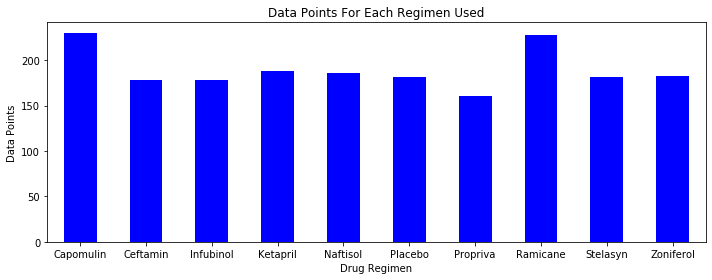

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points=drug_regimen['Mouse ID'].count()
data_points.plot(kind="bar", figsize=(10,4), facecolor="blue", rot=0)
plt.title('Data Points For Each Regimen Used')
plt.ylabel("Data Points")
plt.tight_layout()
plt.show()

<BarContainer object of 10 artists>

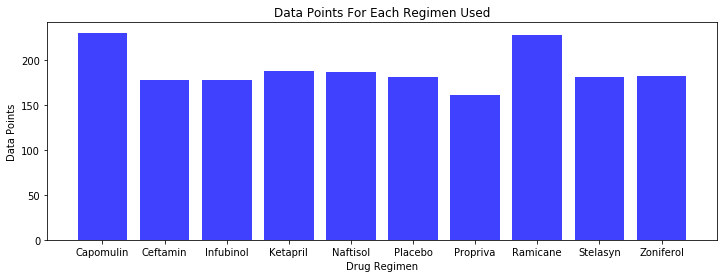

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

drug_regimens = summary_statistics.index.tolist()


x_axis = drug_regimens

data_points_pyplot=(mouse_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis =np.arange(len(data_points))
x_axis = drug_regimens


plt.figure(figsize=(12,4))

plt.title('Data Points For Each Regimen Used')
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")




plt.bar(x_axis, data_points, facecolor="blue", alpha=0.75, align="center")



## Pie plots

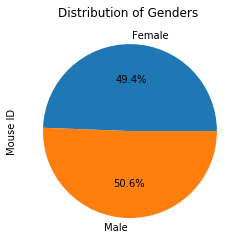

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex= mouse_data.groupby('Sex')
data_gender=sex['Mouse ID'].count()
mouse_pie=data_gender.plot(kind="pie", autopct='%1.1f%%', title=('Distribution of Genders '))





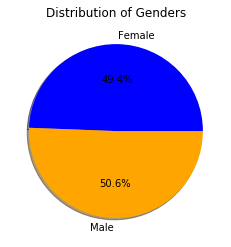

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gendercount_pyplot=(mouse_data.groupby(["Sex"])["Mouse ID"].count()).tolist()
colors = ["b", "orange"]
labels = ["Female", "Male"]
plt.title('Distribution of Genders')
plt.pie(gendercount_pyplot, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
result_df = mouse_data.loc[mouse_data["Timepoint"] == 45]
result_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


## Capomulin

In [8]:
capomulin_df = result_df.loc[result_df['Drug Regimen']=='Capomulin']
capomulin_df = capomulin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capomulin_df = capomulin_df["Tumor Volume (mm3)"]

quartiles = capomulin_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is: 32.37735684
The upper quartile of final tumor volume is: 40.1592203
The interquartile range of final tumor volume is: 7.781863460000004
The the median of final tumor volume is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


## Ramicane 

In [9]:
ramicane_df = result_df.loc[result_df['Drug Regimen']=='Ramicane']
ramicane_df
ramicane_df = ramicane_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramicane_df = ramicane_df["Tumor Volume (mm3)"]

quartiles = ramicane_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is: 30.981175224999998
The upper quartile of final tumor volume is: 38.508305307499995
The interquartile range of final tumor volume is: 7.527130082499998
The the median of final tumor volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


## Infubinol 

In [10]:
#Infubinol data
infubinol_df = result_df.loc[result_df['Drug Regimen']=='Infubinol']
infubinol_df
infubinol_df = infubinol_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infubinol_df = infubinol_df["Tumor Volume (mm3)"]

quartiles = infubinol_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is: 62.75445141
The upper quartile of final tumor volume is: 67.68556862
The interquartile range of final tumor volume is: 4.9311172099999965
The the median of final tumor volume is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


## Ceftamin

In [11]:
#Ceftamin data
ceftamin_df = result_df.loc[result_df['Drug Regimen']=='Ceftamin']
ceftamin_df
ceftamin_df = ceftamin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftamin_df = ceftamin_df["Tumor Volume (mm3)"]

quartiles = ceftamin_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is: 61.43389223
The upper quartile of final tumor volume is: 67.52748237
The interquartile range of final tumor volume is: 6.093590140000003
The the median of final tumor volume is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


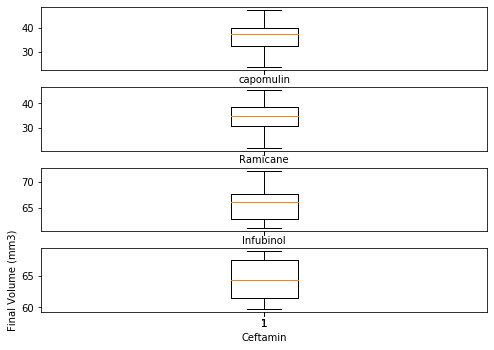

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
plt.ylabel("Final Volume (mm3)")
ax1.boxplot(capomulin_df)
ax1.set_xlabel("capomulin")

ax2.boxplot(ramicane_df)
ax2.set_xlabel("Ramicane")

ax3.boxplot(infubinol_df)
ax3.set_xlabel("Infubinol")

ax4.boxplot(ceftamin_df)
ax4.set_xlabel("Ceftamin")

plt.tight_layout(-2.4)

plt.show()

## Line and scatter plots

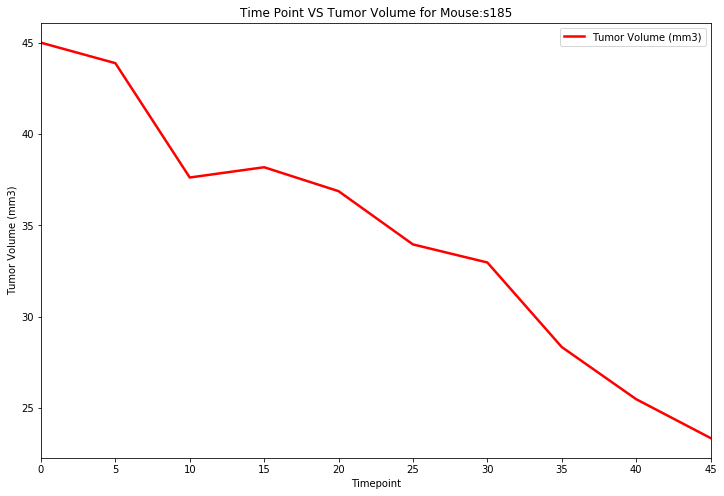

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = mouse_data.loc[mouse_data["Drug Regimen"] == "Capomulin"]
capomulin_data = capomulin_data.reset_index()
capomulin_data
fav_mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]
fav_mouse_data
fav_mouse_plot = fav_mouse_data.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
fav_mouse_plot = fav_mouse_plot.reset_index(drop=True)
fav_mouse_plot
fav_mouse_plot.set_index('Timepoint').plot(figsize=(12, 8), linewidth=2.5, color='red')
plt.title(f'Time Point VS Tumor Volume for Mouse:s185')
plt.ylabel("Tumor Volume (mm3)")
# Show the chart
plt.show()


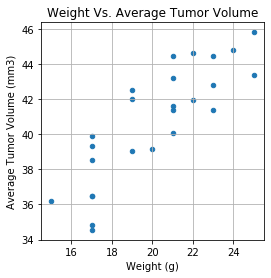

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = capomulin_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
mouse_weight
average_tumor = pd.DataFrame(mouse_weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_tumor
average_tumor=average_tumor.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'})
average_tumor=average_tumor[['Weight (g)','Average Tumor Volume (mm3)']]
average_tumor.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_tumor['Weight (g)'],average_tumor['Average Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}')

if correlation[0] > 0.5:
    print(f'There is a positive correlation between them')
    
else:
    print(f'There is no correlation between them')




The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84
There is a positive correlation between them


The r-squared is: 0.8419363424694718


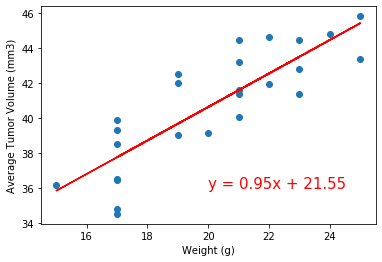

In [16]:
# Print out the r-squared value along with the plot.
x_values = average_tumor['Weight (g)']
y_values = average_tumor['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue}")
plt.show()